## Media Campaign Cost Prediction

Predecir el costo de ejecutar una campaña en los medios para **FoodMarts** de EE.UU.

#### Acerca del DataFrame

**Food Mart (CFM)** es una cadena de tiendas de conveniencia de Estados Unidos. La sede de la empresa privada está ubicada en Mentor, Ohio, y actualmente hay aproximadamente 325 tiendas ubicadas en Estados Unidos. Convenient Food Mart opera en el sistema de franquicia.

Food Mart era la tercera cadena de tiendas de conveniencia más grande del país en 1988.

**El objetivo es entrenar un modelo de Machine Learning que nos ayude a predecir el costo de las campañas de medios en los mercados de alimentos en función de las funciones proporcionadas.**

Fuente: [Kaggle - Media Campaign Cost Prediction](https://www.kaggle.com/datasets/gauravduttakiit/media-campaign-cost-prediction)

- Exploratory Data Analysis:
    - Estudiar la relación de cada columna con la columna objetivo (**cost**) usando visualizaciones.
    - Verificar NaN's o duplicados.
    - Mostrar la matriz de correlación.
    - Mostrar el total de elementos únicos por columna.
    - ¿Cuales columnas son categóricas?
    - ¿Exite alguna columna que esta repetida?
    - ¿El modelo es una Regresión o una Clasificación?
    - Usar RandomForest para ver el **_feature_importance_** de las columnas.
<br>
- Machine Learning:
    - Hacer **_train_test_split_**. Usa **_random_state = 42_**
    - Probar todos los modelos y calcular las métricas para encontrar el que mejor se adapta a los datos.
    - Hacer **_GridSearchCV_** para encontrar los mejores parámetros para ese modelo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas para Regresiones
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Metricas para Clasificadores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import jaccard_score

# Modelos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Validacion
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

#### Descripción de las columnas:

|Feature                        |Description                                              |
|-------------------------------|---------------------------------------------------------|
|**store_sales(in millions)**   |Store sales in millions.                                 |
|**unit_sales(in millions)**    |Quantity of units sold in millions.                      |
|**total_children**             |Total children in home.                                  |
|**num_children_at_home**       |Total children at home as per customer filled details.   |
|**avg_cars_at_home(approx).1** |Average cars at home.                                    |
|**gross_weight**               |Gross weight of an item.                                 |
|**recyclable_package**         |If the package of the food item is recycleble 1 or not 0.|
|**low_fat**                    |If an item is a low fat 1 or not 0.                      |
|**units_per_case**             |Units/case units available in each store shelves.        |
|**store_sqft**                 |Store area available in sqft.                            |
|**coffee_bar**                 |If a store has a coffee bar available 1 or not 0.        |
|**video_store**                |If a video store/gaming store is available 1 or not 0.   |
|**salad_bar**                  |If a salad bar is available in a store 1 or not 0.       |
|**prepared_food**              |If a prepared food is available in a store 1 or not 0.   |
|**florist**                    |If flower shelves are available in a store 1 or not 0.   |
|**cost**                       |Cost on acquiring a customers in dollars. (**target**)   |

In [3]:
df = pd.read_csv("../media_campaign_dataset.csv")

df = df.drop_duplicates()

df.head(3)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20


In [4]:
# Renombro las columnas con parentesis

df.columns = [x.split("(")[0] if "(" in x else x for x in df.columns]

df.columns = ["_".join(x.split(" ")) for x in df.columns]

df.columns

Index(['store_sales', 'unit_sales', 'total_children', 'num_children_at_home',
       'avg_cars_at_home', 'gross_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist', 'cost'],
      dtype='object')

#### Información del DataFrame

In [5]:
df.shape

(51328, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51328 entries, 0 to 51362
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_sales           51328 non-null  float64
 1   unit_sales            51328 non-null  float64
 2   total_children        51328 non-null  float64
 3   num_children_at_home  51328 non-null  float64
 4   avg_cars_at_home      51328 non-null  float64
 5   gross_weight          51328 non-null  float64
 6   recyclable_package    51328 non-null  float64
 7   low_fat               51328 non-null  float64
 8   units_per_case        51328 non-null  float64
 9   store_sqft            51328 non-null  float64
 10  coffee_bar            51328 non-null  float64
 11  video_store           51328 non-null  float64
 12  salad_bar             51328 non-null  float64
 13  prepared_food         51328 non-null  float64
 14  florist               51328 non-null  float64
 15  cost               

In [7]:
# NaN's

df.isna().sum()

store_sales             0
unit_sales              0
total_children          0
num_children_at_home    0
avg_cars_at_home        0
gross_weight            0
recyclable_package      0
low_fat                 0
units_per_case          0
store_sqft              0
coffee_bar              0
video_store             0
salad_bar               0
prepared_food           0
florist                 0
cost                    0
dtype: int64

In [8]:
df.describe()

,store_sales,unit_sales,total_children,num_children_at_home,avg_cars_at_home,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000
mean,6.531981,3.091217,2.538303,0.832294,2.199423,13.805998,0.558467,0.351114,18.855888,27979.016287,0.612278,0.353608,0.587905,0.587905,0.561721,99.329109
std,3.465144,0.827387,1.489357,1.303889,1.109216,4.622391,0.496575,0.477323,10.263098,5701.854747,0.487235,0.478094,0.492217,0.492217,0.496181,30.024247
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.800000,3.000000,1.000000,0.000000,1.000000,9.700000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.640000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [9]:
df.nunique()

store_sales             1030
unit_sales                 6
total_children             6
num_children_at_home       6
avg_cars_at_home           5
gross_weight             376
recyclable_package         2
low_fat                    2
units_per_case            36
store_sqft                20
coffee_bar                 2
video_store                2
salad_bar                  2
prepared_food              2
florist                    2
cost                     328
dtype: int64

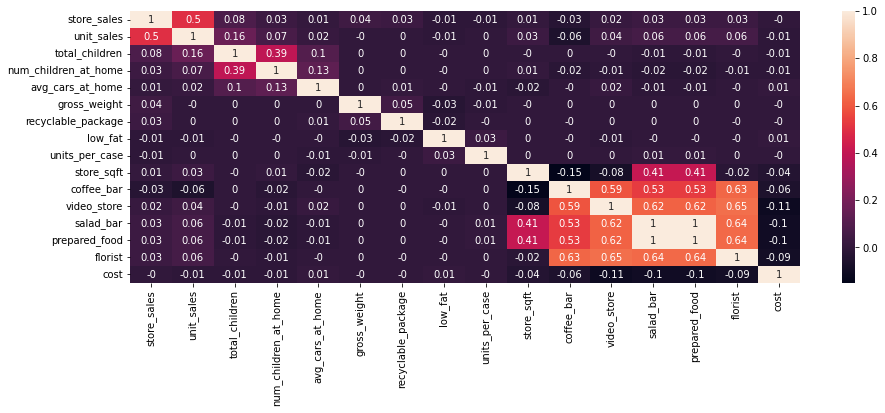

In [10]:
# Correlación

plt.figure(figsize = (15, 5))

sns.heatmap(data = df.corr().round(2), annot = True)
plt.show()

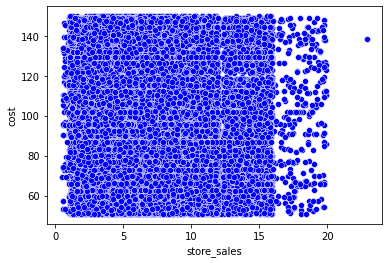

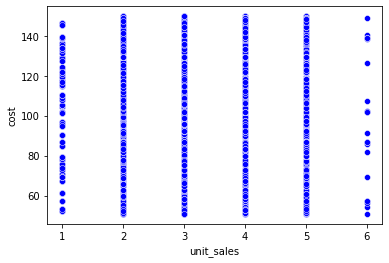

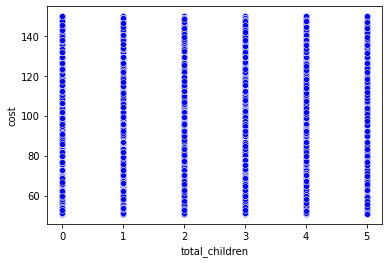

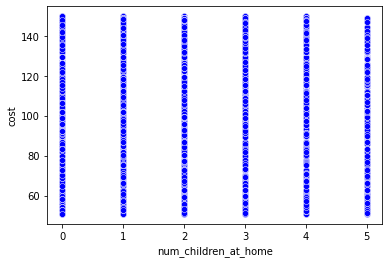

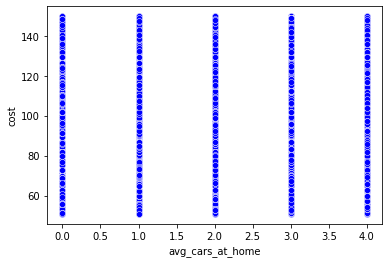

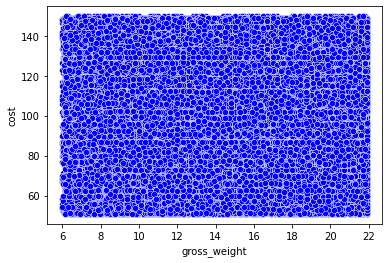

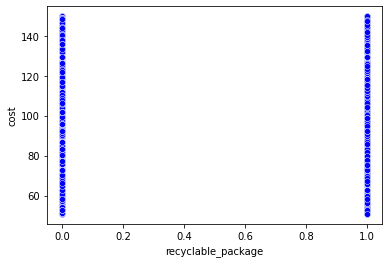

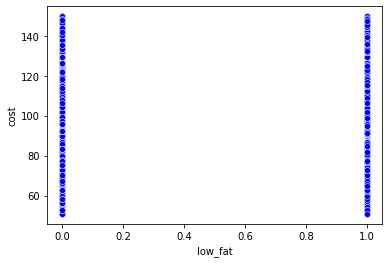

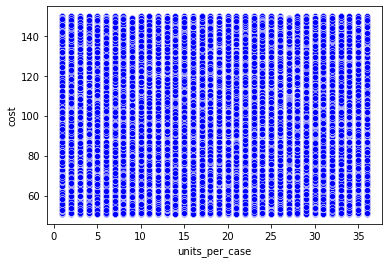

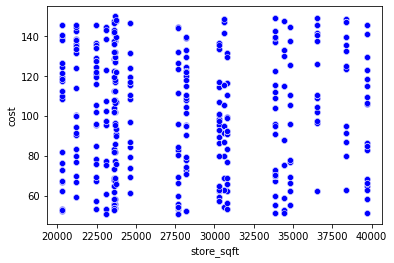

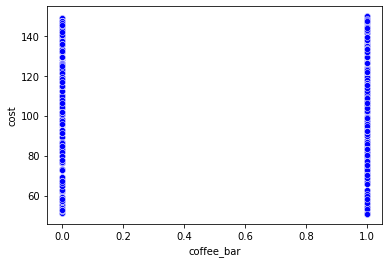

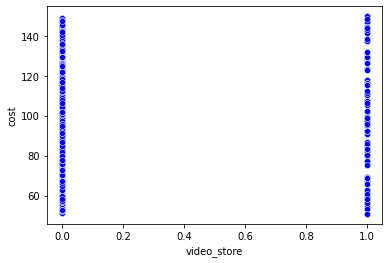

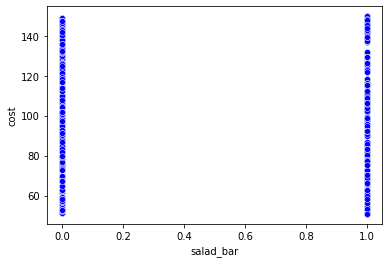

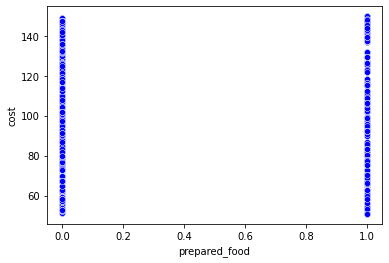

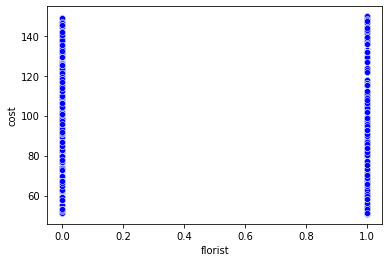

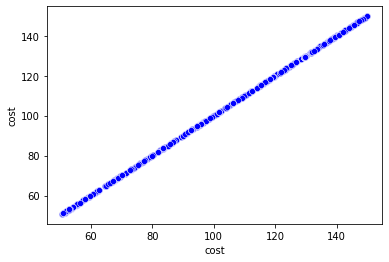

In [11]:
# Relación de columnas con "cost"

for col in df.columns:
    
    sns.scatterplot(x = df[col], y = df["cost"], color = "blue")
    plt.show()    

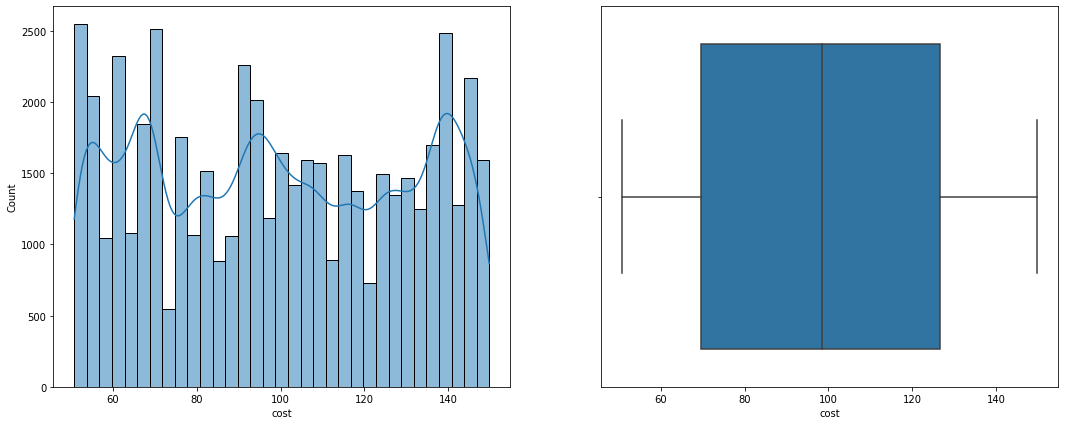

In [12]:
# cost

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["cost"], kde = True, ax = axes[0]);
sns.boxplot(x = df["cost"], ax = axes[1]);
plt.show()

In [13]:
# store_sales

df["store_sales"]

0         2.68
1         5.73
2         2.62
3        11.73
4         4.82
         ...  
51358     3.70
51359    10.36
51360    11.19
51361     3.78
51362     2.91
Name: store_sales, Length: 51328, dtype: float64

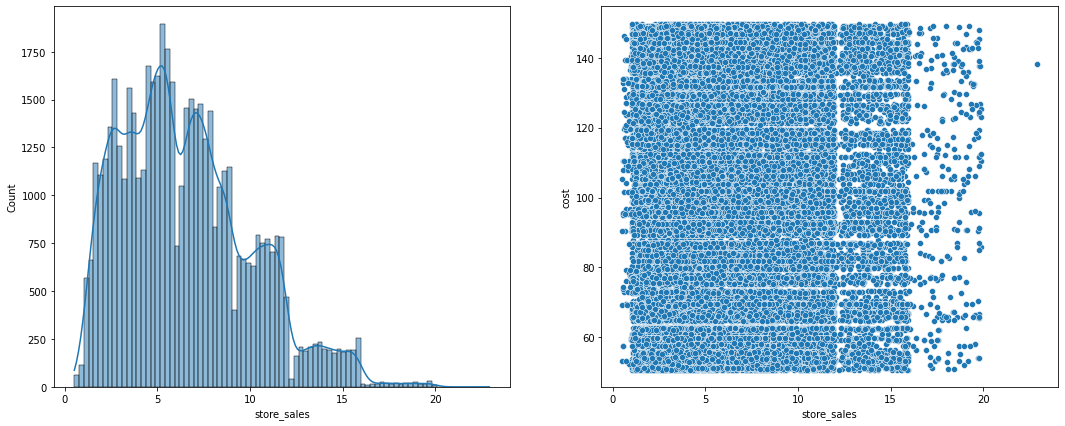

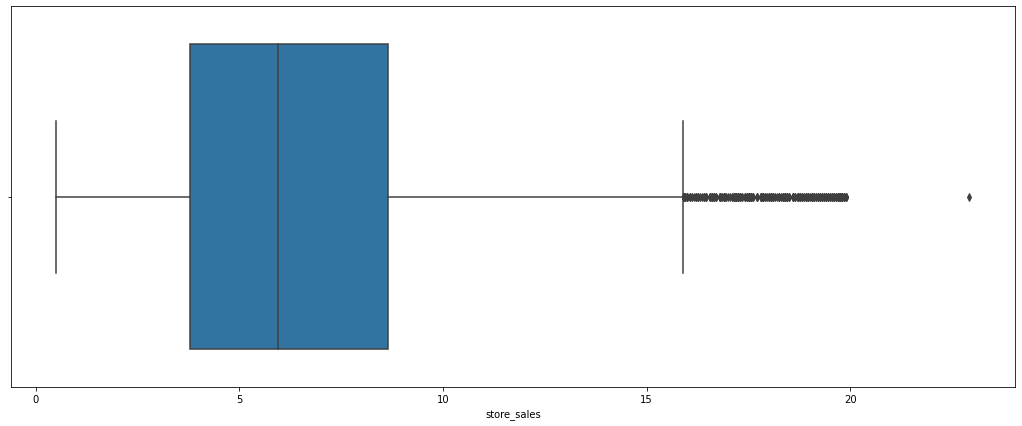

In [14]:
# Relación de la columna "store_sales" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["store_sales"], kde = True, ax = axes[0]);
sns.scatterplot(x = df["store_sales"], y = df["cost"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df["store_sales"]);
plt.show()

In [15]:
# unit_sales

df["unit_sales"].value_counts()

3.0    23423
4.0    14018
2.0    11369
5.0     1741
1.0      756
6.0       21
Name: unit_sales, dtype: int64

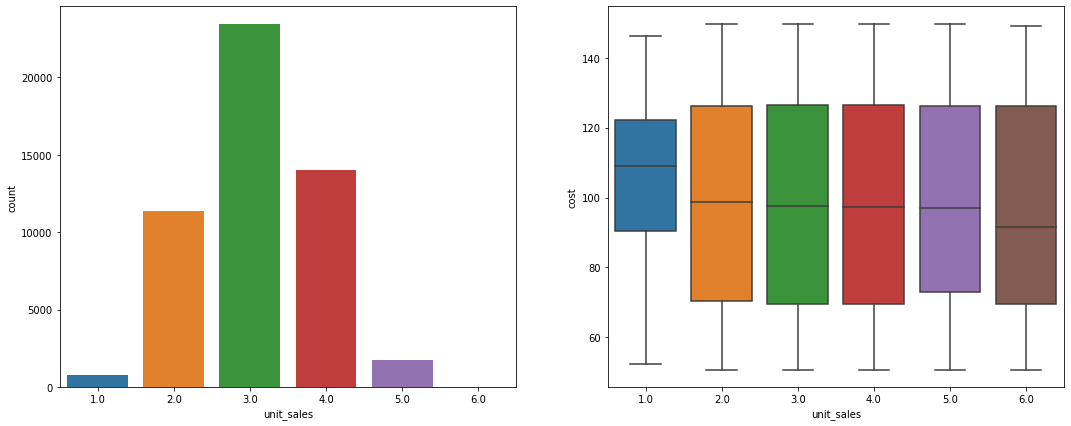

In [16]:
# Relación de la columna "unit_sales" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["unit_sales"], ax = axes[0]);
sns.boxplot(x = df["unit_sales"], y = df["cost"], ax = axes[1]);
plt.show()

In [17]:
# total_children

df["total_children"].value_counts()

2.0    10704
4.0    10568
3.0    10108
1.0     9932
5.0     5270
0.0     4746
Name: total_children, dtype: int64

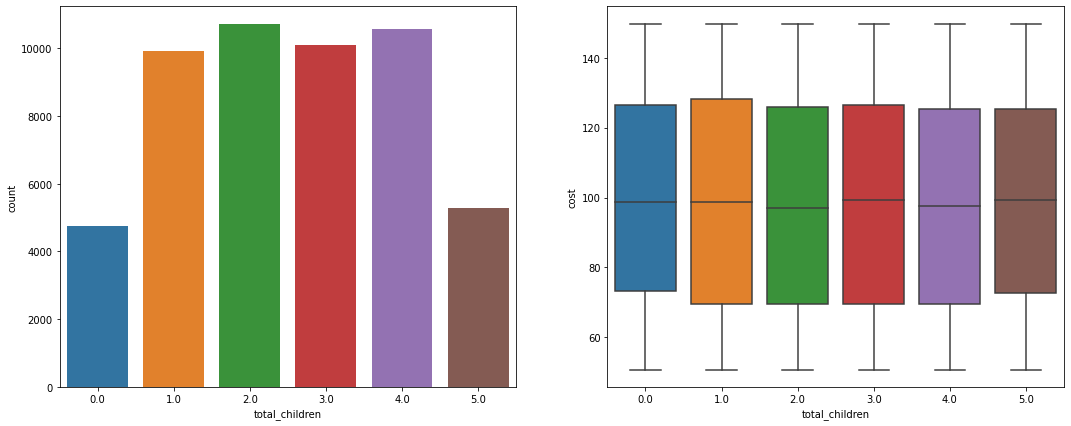

In [18]:
# Relación de la columna "total_children" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["total_children"], ax = axes[0]);
sns.boxplot(x = df["total_children"], y = df["cost"], ax = axes[1]);
plt.show()

In [19]:
# num_children_at_home

df["num_children_at_home"].value_counts()

0.0    31845
1.0     7542
2.0     5005
3.0     3732
4.0     2048
5.0     1156
Name: num_children_at_home, dtype: int64

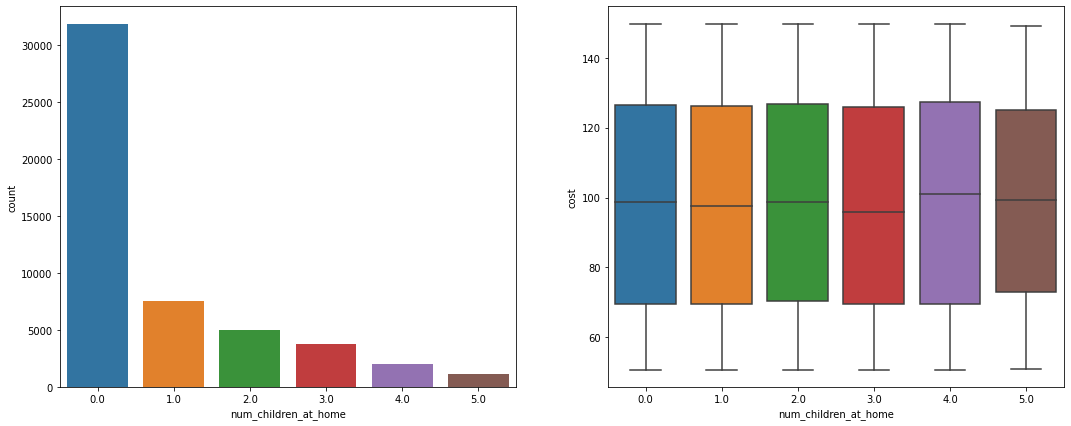

In [20]:
# Relación de la columna "num_children_at_home" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["num_children_at_home"], ax = axes[0]);
sns.boxplot(x = df["num_children_at_home"], y = df["cost"], ax = axes[1]);
plt.show()

In [21]:
# avg_cars_at_home

df["avg_cars_at_home"].value_counts()

2.0    15506
3.0    14410
1.0    11622
4.0     6757
0.0     3033
Name: avg_cars_at_home, dtype: int64

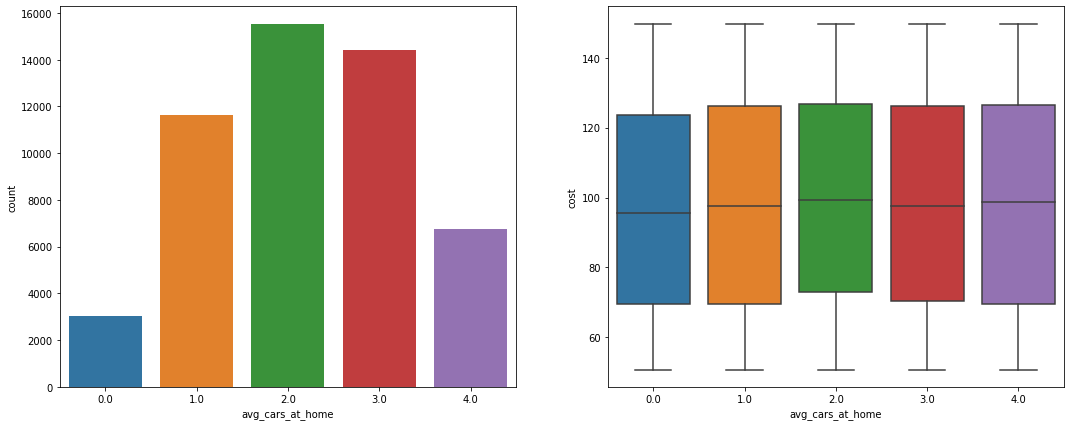

In [22]:
# Relación de la columna "avg_cars_at_home" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["avg_cars_at_home"], ax = axes[0]);
sns.boxplot(x = df["avg_cars_at_home"], y = df["cost"], ax = axes[1]);
plt.show()

In [23]:
# gross_weight

df["gross_weight"]

0         6.30
1        18.70
2         9.21
3        10.90
4         8.15
         ...  
51358    10.40
51359     9.43
51360    18.50
51361    19.80
51362     9.80
Name: gross_weight, Length: 51328, dtype: float64

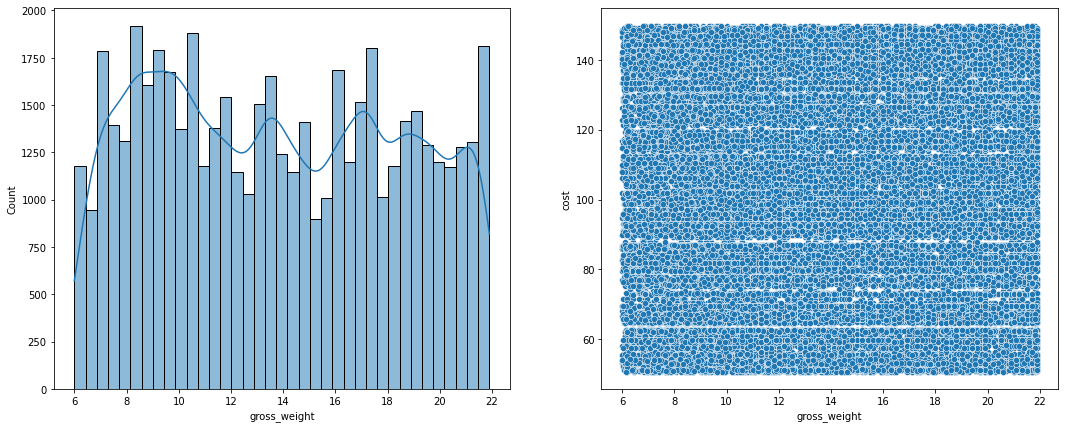

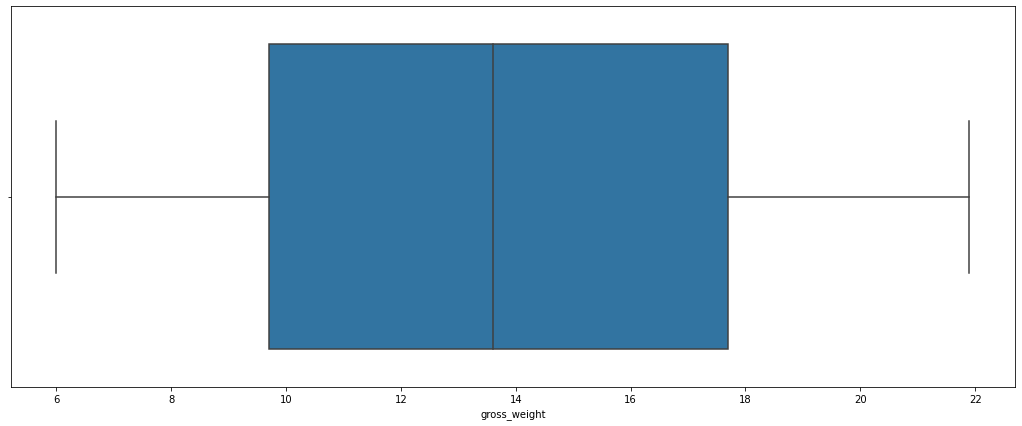

In [24]:
# Relación de la columna "gross_weight" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["gross_weight"], kde = True, ax = axes[0]);
sns.scatterplot(x = df["gross_weight"], y = df["cost"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df["gross_weight"]);
plt.show()

In [25]:
# recyclable_package

df["recyclable_package"].value_counts()

1.0    28665
0.0    22663
Name: recyclable_package, dtype: int64

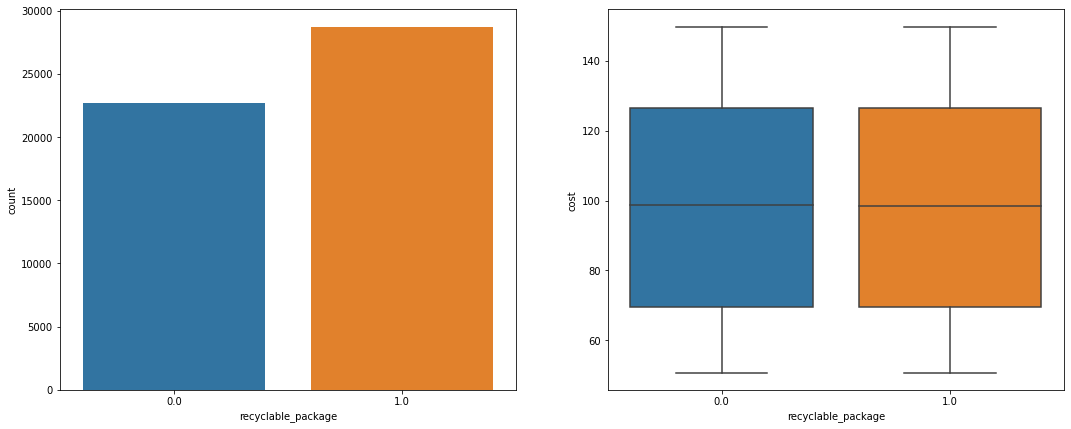

In [26]:
# Relación de la columna "recyclable_package" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["recyclable_package"], ax = axes[0]);
sns.boxplot(x = df["recyclable_package"], y = df["cost"], ax = axes[1]);
plt.show()

In [27]:
# low_fat

df["low_fat"].value_counts()

0.0    33306
1.0    18022
Name: low_fat, dtype: int64

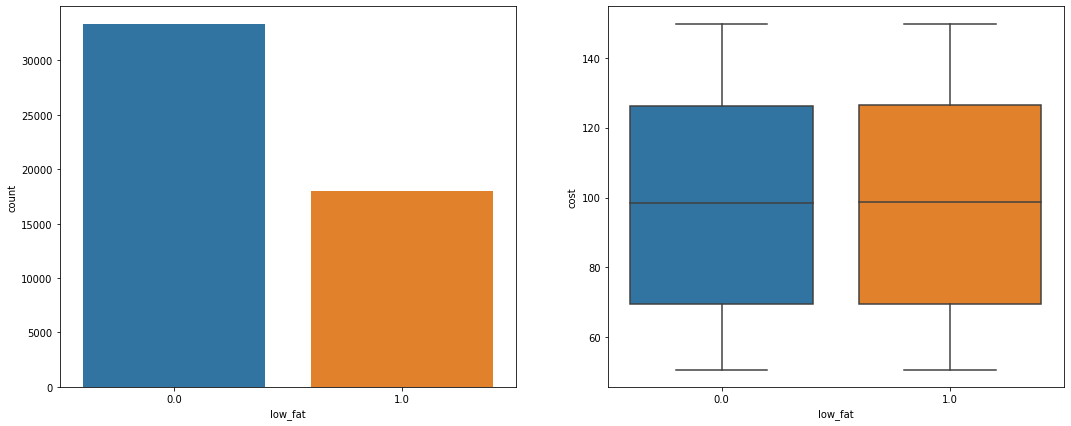

In [28]:
# Relación de la columna "low_fat" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["low_fat"], ax = axes[0]);
sns.boxplot(x = df["low_fat"], y = df["cost"], ax = axes[1]);
plt.show()

In [29]:
# units_per_case

df["units_per_case"].value_counts()

29.0    1960
6.0     1925
33.0    1898
30.0    1779
31.0    1765
23.0    1754
26.0    1705
25.0    1671
5.0     1671
9.0     1666
3.0     1610
13.0    1528
34.0    1482
19.0    1433
21.0    1420
14.0    1420
22.0    1410
27.0    1391
24.0    1384
32.0    1374
4.0     1356
2.0     1327
35.0    1327
17.0    1323
15.0    1292
28.0    1291
11.0    1276
20.0    1272
7.0     1228
16.0    1223
18.0    1220
10.0    1181
12.0    1169
8.0     1154
1.0      800
36.0     643
Name: units_per_case, dtype: int64

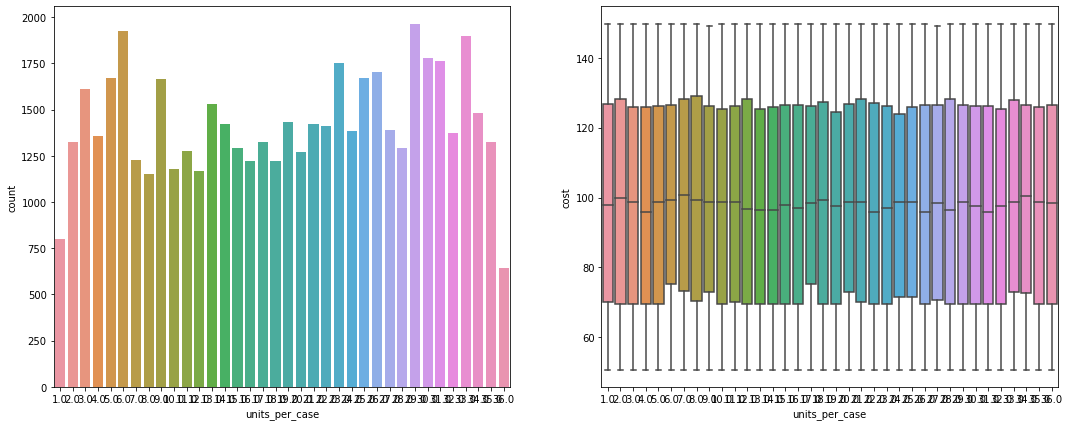

In [30]:
# Relación de la columna "units_per_case" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["units_per_case"], ax = axes[0]);
sns.boxplot(x = df["units_per_case"], y = df["cost"], ax = axes[1]);
plt.show()

In [31]:
# store_sqft

df["store_sqft"].value_counts()

33858.0    4829
27694.0    4637
20319.0    4381
21215.0    4287
30797.0    3802
30268.0    3760
23688.0    3517
23598.0    3370
30584.0    3296
39696.0    2923
23112.0    2898
34791.0    2270
23759.0    2004
23593.0    1284
36509.0    1163
38382.0     750
22478.0     679
28206.0     612
34452.0     479
24597.0     387
Name: store_sqft, dtype: int64

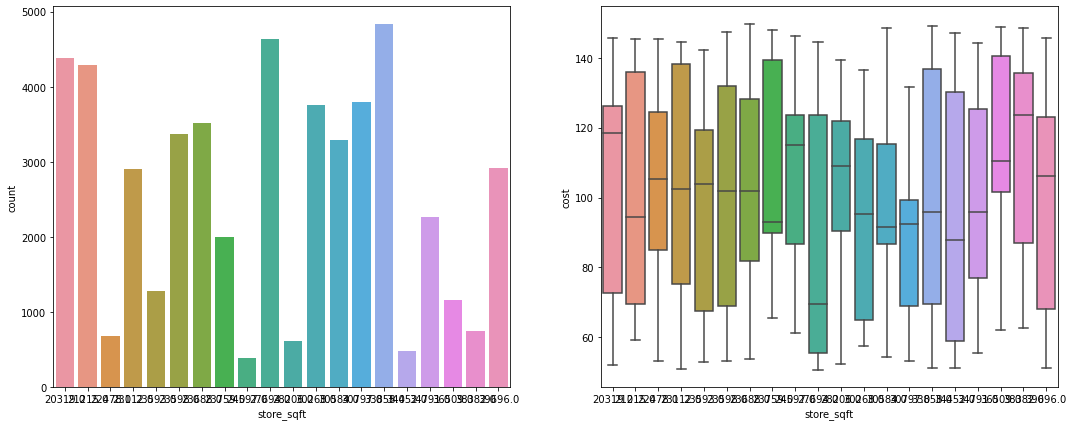

In [32]:
# Relación de la columna "store_sqft" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["store_sqft"], ax = axes[0]);
sns.boxplot(x = df["store_sqft"], y = df["cost"], ax = axes[1]);
plt.show()

In [33]:
# coffee_bar

df["coffee_bar"].value_counts()

1.0    31427
0.0    19901
Name: coffee_bar, dtype: int64

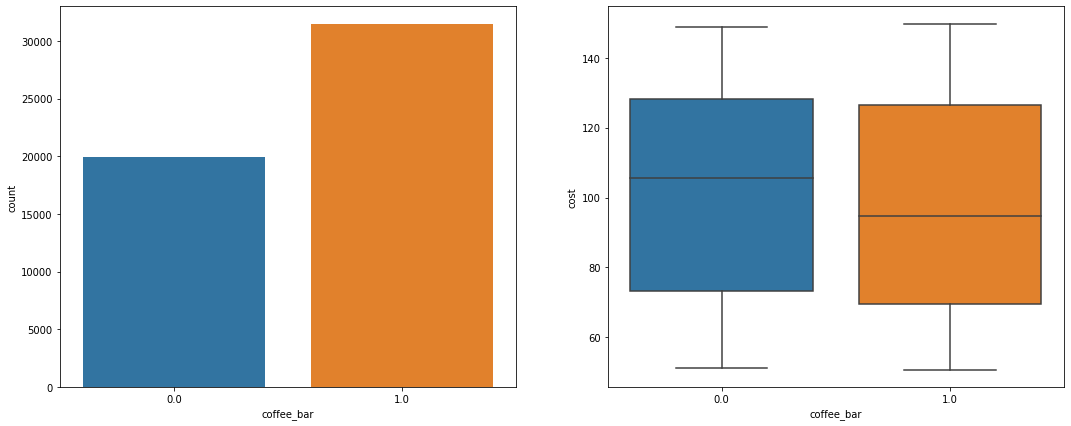

In [34]:
# Relación de la columna "coffee_bar" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["coffee_bar"], ax = axes[0]);
sns.boxplot(x = df["coffee_bar"], y = df["cost"], ax = axes[1]);
plt.show()

In [35]:
# video_store

df["video_store"].value_counts()

0.0    33178
1.0    18150
Name: video_store, dtype: int64

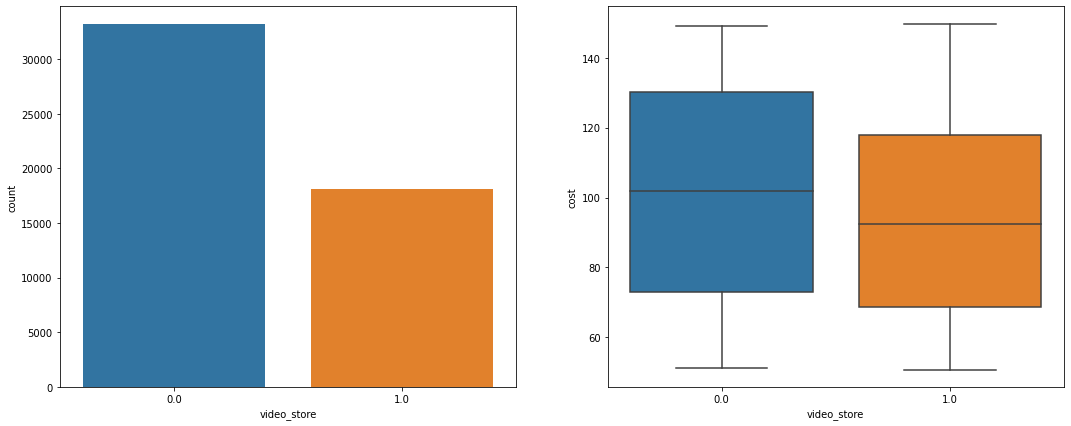

In [36]:
# Relación de la columna "video_store" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["video_store"], ax = axes[0]);
sns.boxplot(x = df["video_store"], y = df["cost"], ax = axes[1]);
plt.show()

In [37]:
# salad_bar

df["salad_bar"].value_counts()

1.0    30176
0.0    21152
Name: salad_bar, dtype: int64

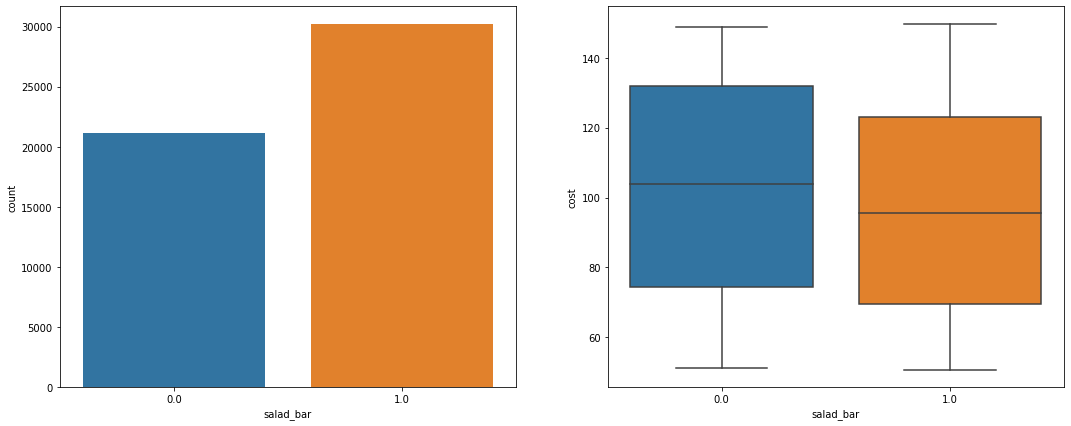

In [38]:
# Relación de la columna "salad_bar" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["salad_bar"], ax = axes[0]);
sns.boxplot(x = df["salad_bar"], y = df["cost"], ax = axes[1]);
plt.show()

In [39]:
# prepared_food

df["prepared_food"].value_counts()

1.0    30176
0.0    21152
Name: prepared_food, dtype: int64

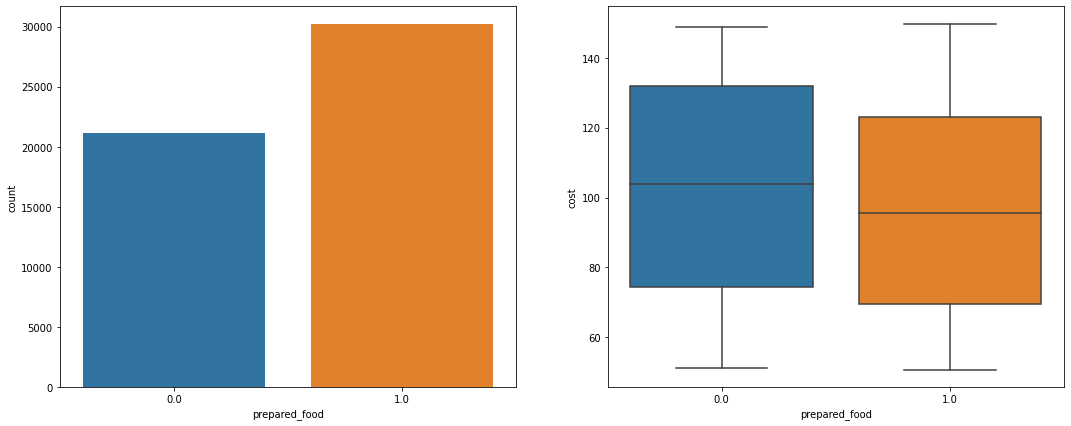

In [40]:
# Relación de la columna "prepared_food" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["prepared_food"], ax = axes[0]);
sns.boxplot(x = df["prepared_food"], y = df["cost"], ax = axes[1]);
plt.show()

In [41]:
# florist

df["florist"].value_counts()

1.0    28832
0.0    22496
Name: florist, dtype: int64

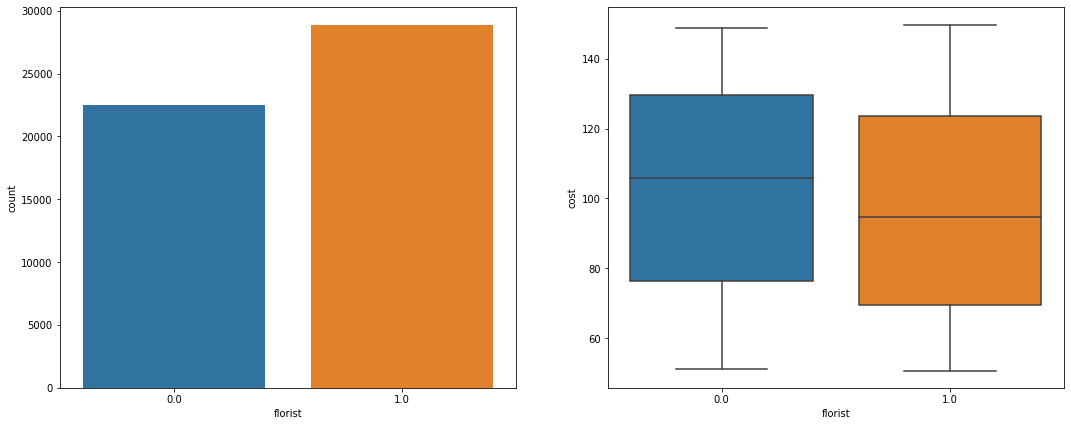

In [42]:
# Relación de la columna "florist" con "cost"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["florist"], ax = axes[0]);
sns.boxplot(x = df["florist"], y = df["cost"], ax = axes[1]);
plt.show()

In [43]:
df.drop("salad_bar", axis = 1, inplace = True)

#### Columna: cost

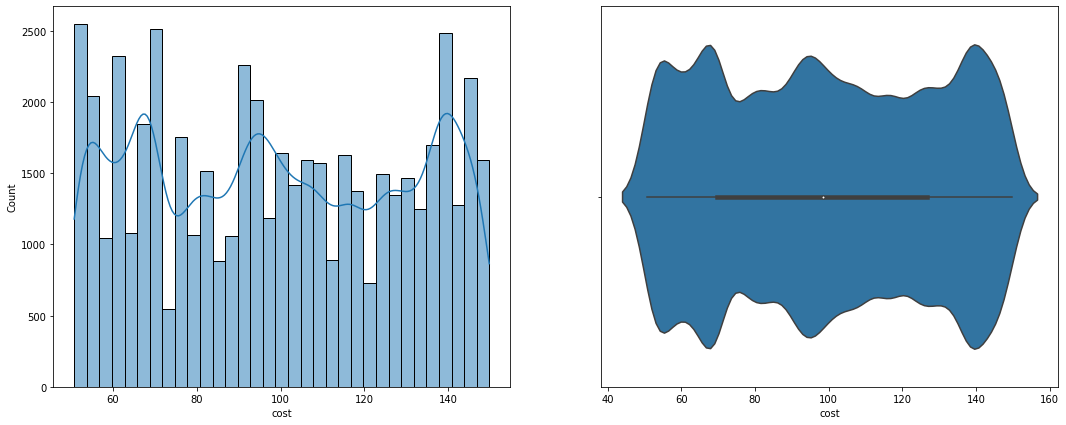

In [44]:
fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["cost"], kde = True, ax = axes[0]);
sns.violinplot(x = df["cost"], ax = axes[1]);
plt.show()

In [45]:
df["cost"].describe()

count    51328.000000
mean        99.329109
std         30.024247
min         50.790000
25%         69.650000
50%         98.520000
75%        126.620000
max        149.750000
Name: cost, dtype: float64

In [46]:
from sklearn.cluster import KMeans

lista_inercias = list()

col = df['cost'].values.reshape(-1, 1)

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    
    kmeans.fit(col)
    
    lista_inercias.append(kmeans.inertia_)
    
lista_inercias

[46269002.93112172,
 11409747.467224803,
 4485035.412055023,
 2568476.2637851737,
 1706608.2913341636,
 1155540.110814969,
 774162.1416027278,
 606493.4948659248,
 469777.0351752034,
 382398.99925278575]

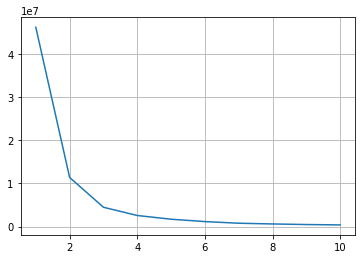

In [47]:
plt.plot(range(1, 11), lista_inercias)
plt.grid()
plt.show()

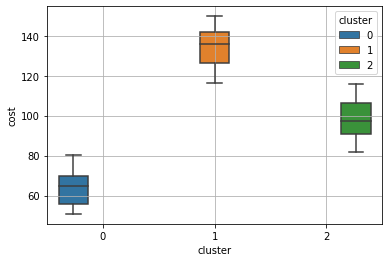

In [48]:
# Seleccionamos k = 3

kmeans = KMeans(n_clusters = 3)

kmeans.fit(col)

df["cluster"] = kmeans.labels_

sns.boxplot(x = df["cluster"], y = df["cost"], hue = df["cluster"])
plt.grid()
plt.show()

In [49]:
df["cluster"].value_counts(normalize = True)

1    0.341276
2    0.332216
0    0.326508
Name: cluster, dtype: float64

#### X, y

In [50]:
X = df.drop(["cost", "cluster"], axis = 1)
y = df[["cluster"]]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (51328, 14)
y: (51328, 1)


C:\Users\botic\AppData\Local\Temp/ipykernel_21244/2299735127.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


Feature Importance:
 1. feature  0 (  0.21666353720677708): store_sales
 2. feature  1 (  0.21026682096539126): gross_weight
 3. feature  2 (  0.17940118470507124): units_per_case
 4. feature  3 (  0.08244401246344736): total_children
 5. feature  4 (  0.06704811803269568): avg_cars_at_home
 6. feature  5 (  0.06538287423056421): store_sqft
 7. feature  6 (  0.05648759622486503): unit_sales
 8. feature  7 (  0.05214961007250458): num_children_at_home
 9. feature  8 (  0.02806061060814417): recyclable_package
10. feature  9 ( 0.025225678461338333): low_fat
11. feature 10 ( 0.005303173887833331): prepared_food
12. feature 11 (0.0041330237833066075): video_store
13. feature 12 ( 0.003971893224678745): florist
14. feature 13 (0.0034618661333823113): coffee_bar


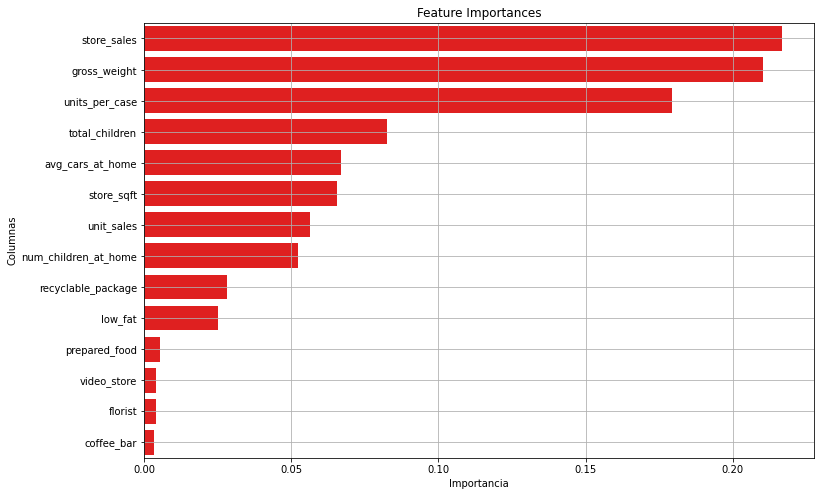

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestClassifier(n_estimators = 250,
                               random_state = 42)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

df_importances = pd.DataFrame(data = zip(X.columns, importances),
                              columns = ["Columnas", "Importancia"])

df_importances = df_importances.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df_importances.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:21}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df_importances["Importancia"], y = df_importances["Columnas"], color = "red")

plt.grid()
plt.show()

#### Train, Test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (41062, 14), y_train: (41062, 1)
X_test: (10266, 14), y_test: (10266, 1)


#### Normalizar los datos

In [53]:
# Train

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

# Test

X_test = x_scaler.transform(X_test)

In [54]:
%%time

modelos = [LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(),
           RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

df_metricas = list()

for model in modelos:
    
    print(str(model))
    
    model.fit(X_train, y_train)
    
    yhat = model.predict(X_test)
    
    acc = accuracy_score(y_test, yhat)
    rec = recall_score(y_test, yhat, average = "macro")
    f1s = f1_score(y_test, yhat, average = "macro")
    # roc = roc_auc_score(y_test, yhat, multi_class = "ovo")
    mat = confusion_matrix(y_test, yhat)
    
    df_metricas.append([str(model), model, acc, rec, f1s, mat])

LogisticRegression()
KNeighborsClassifier()


C:\Users\botic\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\botic\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


SVC()


C:\Users\botic\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()
RandomForestClassifier()


<timed exec>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


AdaBoostClassifier()


C:\Users\botic\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()


C:\Users\botic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 1min 45s


In [55]:
df_metricas = pd.DataFrame(data = df_metricas, columns = ["name", "model", "accuracy", "recall", "f1_score", "cm"])

df_metricas.sort_values(by = "recall", ascending = False)

,name,model,accuracy,recall,f1_score,cm
6,GradientBoostingClassifier(),([DecisionTreeRegressor(criterion='friedman_ms...,0.454218,0.452834,0.450379,"[[1159, 1103, 1066], [702, 1709, 1076], [587, ..."
4,RandomForestClassifier(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.451296,0.450842,0.450742,"[[1395, 997, 936], [898, 1646, 943], [875, 984..."
5,AdaBoostClassifier(),"(DecisionTreeClassifier(max_depth=1, random_st...",0.444574,0.443400,0.442077,"[[1213, 1121, 994], [788, 1774, 925], [651, 12..."
2,SVC(),SVC(),0.433275,0.432446,0.431756,"[[1260, 1122, 946], [859, 1691, 937], [850, 11..."
3,DecisionTreeClassifier(),DecisionTreeClassifier(),0.401033,0.400930,0.400930,"[[1311, 1033, 984], [1030, 1417, 1040], [1058,..."
1,KNeighborsClassifier(),KNeighborsClassifier(),0.381843,0.382883,0.377380,"[[1583, 1098, 647], [1393, 1406, 688], [1418, ..."
0,LogisticRegression(),LogisticRegression(),0.384278,0.382145,0.374819,"[[807, 1345, 1176], [690, 1790, 1007], [728, 1..."
